 # Compare old and new solutions visually, and evaluate roundtrip errors #

In [1]:
import miricoord.mrs.mrs_tools as mt
import numpy as np
from numpy import matlib as mb
import matplotlib.pyplot as plt

In [2]:
# All pixels
channel='3C'
ymin,ymax=0,1023#500,501
xmin,xmax=513,1031#0,512

In [3]:
# All pixels
xrow=np.mgrid[xmin:xmax]
yrow=np.mgrid[ymin:ymax]
xall=mb.repmat(xrow,yrow.size,1)*1.
yall=mb.repmat(yrow,xrow.size,1)*1.
yall=np.transpose(yall)
# Recast as 1d arrays
xall=xall.reshape(-1)
yall=yall.reshape(-1)

In [4]:
# CDP-8b
mt.set_toolversion('cdp8b')

In [5]:
# Convert to alpha/beta
values=mt.xytoabl(xall,yall,channel,trim=1)
alpha=values['alpha']
beta=values['beta']
lam=values['lam']

In [6]:
v2,v3=mt.abtov2v3(alpha,beta,channel)

In [7]:
alpha2,beta2=mt.v2v3toab(v2,v3,channel)

In [8]:
values2=mt.abltoxy(alpha2,beta2,lam,channel)

In [9]:
# FLT-1
mt.set_toolversion('flt1')

In [10]:
# Convert to alpha/beta
values_flt1=mt.xytoabl(xall,yall,channel,trim=1)
alpha_flt1=values_flt1['alpha']
beta_flt1=values_flt1['beta']
lam_flt1=values_flt1['lam']

In [11]:
v2_flt1,v3_flt1=mt.abtov2v3(alpha_flt1,beta_flt1,channel)

In [12]:
alpha2_flt1,beta2_flt1=mt.v2v3toab(v2_flt1,v3_flt1,channel)

In [13]:
values2_flt1=mt.abltoxy(alpha2_flt1,beta2_flt1,lam_flt1,channel)

In [14]:
#indx=100
#values_flt1['alpha'][indx],values_flt1['beta'][indx],values_flt1['lam'][indx],values_flt1['x'][indx],values_flt1['y'][indx]

In [15]:
#indx=100
#values2_flt1['alpha'][indx],values2_flt1['beta'][indx],values2_flt1['lam'][indx],values2_flt1['x'][indx],values2_flt1['y'][indx]

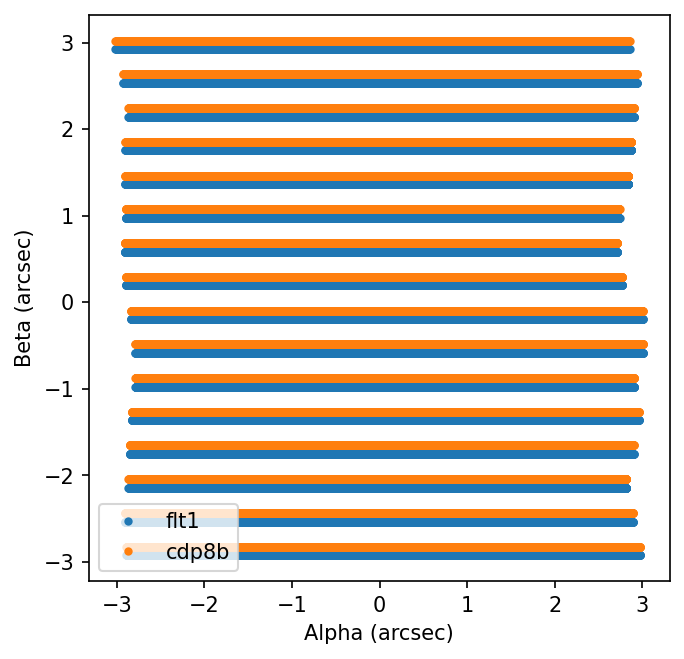

In [16]:
plt.figure(figsize=(5,5),dpi=150)
ax = plt.gca()
plt.plot(alpha_flt1,beta_flt1,'.',label='flt1')
plt.plot(alpha,beta+0.1,'.',label='cdp8b')
plt.xlabel('Alpha (arcsec)')
plt.ylabel('Beta (arcsec)')
plt.legend()

In [17]:
print(np.mean(alpha_flt1),np.mean(alpha))

0.019895542218593135 0.019895542218593135


In [18]:
print(np.max(alpha),np.min(alpha))

3.0115411061274244 -3.0183423870166735


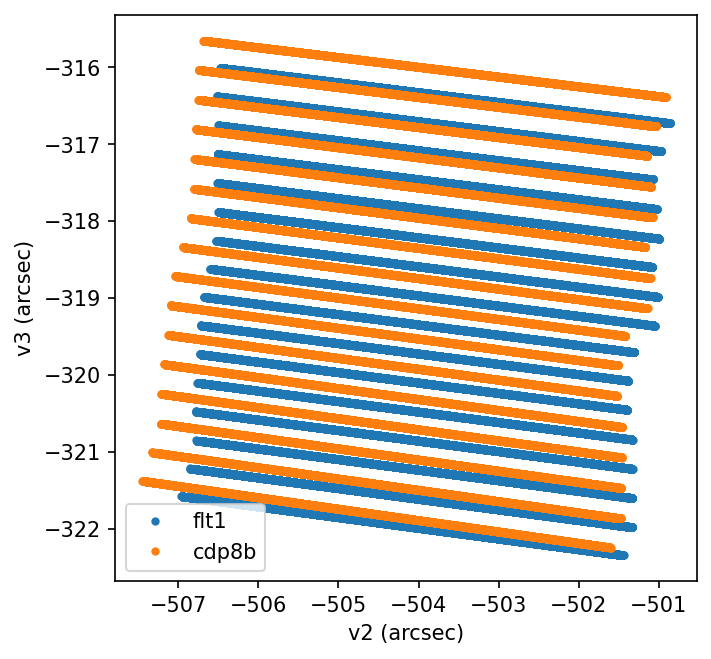

In [19]:
plt.figure(figsize=(5,5),dpi=150)
ax = plt.gca()
plt.plot(v2_flt1,v3_flt1,'.',label='flt1')
plt.plot(v2,v3+0.1,'.',label='cdp8b')
plt.xlabel('v2 (arcsec)')
plt.ylabel('v3 (arcsec)')
plt.legend()
#plt.xlim(-505.5, -505.0)
#plt.ylim(-320.5,-320)

In [20]:
da=alpha_flt1-alpha2_flt1
db=beta_flt1-beta2_flt1

#indx=(np.where((values2['slicenum'] > 0) ))[0]
indx=(np.where((values2_flt1['x'] > -300) ))[0]


dx=values_flt1['x']-values2_flt1['x']
#dx=dx[indx]
dy=values_flt1['y']-values2_flt1['y']
#dy=dy[indx]

In [21]:
dy[100]

-0.0055395757645345335

In [22]:
values_flt1['alpha'][100],values2_flt1['alpha'][100]

(1.5538338290537013, 1.553033369868274)

In [23]:
values_flt1['beta'][100],values2_flt1['beta'][100]

(2.143975780804, 2.144511398069426)

(array([27375., 38411., 38562., 38651., 38510., 38712., 38728., 38745.,
        39161., 29354.]),
 array([-3.01674529e+00, -2.41363687e+00, -1.81052846e+00, -1.20742004e+00,
        -6.04311623e-01, -1.20320674e-03,  6.01905210e-01,  1.20501363e+00,
         1.80812204e+00,  2.41123046e+00,  3.01433887e+00]),
 <BarContainer object of 10 artists>)

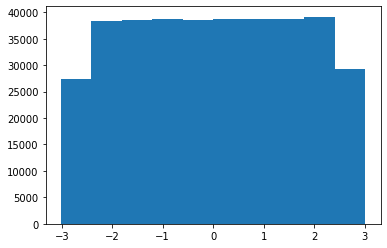

In [24]:
junk=values2_flt1['alpha'][indx]
plt.hist(junk)

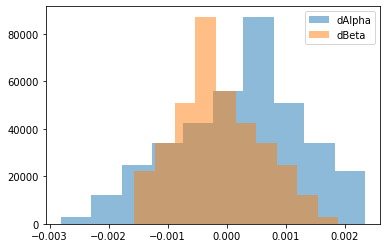

In [25]:
plt.hist(da,alpha=0.5,label='dAlpha')
plt.hist(db,alpha=0.5,label='dBeta')
plt.legend()

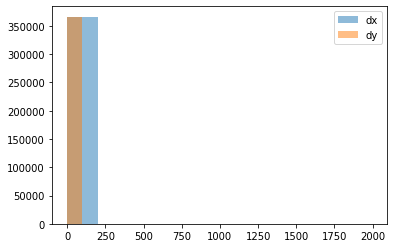

In [26]:
plt.hist(dx,alpha=0.5,label='dx')
plt.hist(dy,alpha=0.5,label='dy')
plt.legend()

In [31]:
indx=np.where(dx > 200)
values_flt1['x'][indx]

array([928., 929., 930., 931., 932., 933., 934., 935., 936., 960., 961.,
       985., 986., 987., 988., 989., 990., 991., 992., 993., 994.])

In [28]:
values2_flt1['x'][indx]

array([-999., -999., -999., -999., -999., -999., -999., -999., -999.,
       -999., -999., -999., -999., -999., -999., -999., -999., -999.,
       -999., -999., -999.])

In [29]:
len(dx)

366230